# Magic Stats
A letter denotes that the player won with the deck in the row over the deck of the column. 

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set sns style 
sns.set_style('darkgrid')

# Read data
data = pd.read_csv('data.csv', index_col=0)
data.fillna('', inplace= True)
data = data.replace('x', '')

# Following needs to be inputed before running the rest of the notebook 
players = ['m', 'e']
names = ['Max', 'Emilie', 'Total'] 

# Extract relevant data
columns = data.columns
len_names = len(names)

# Select decks 
# columns = ['Vampire', 'Atraxa']

# Remove decks
columns = columns.drop(['Mutate','Scrap'])

data = data[columns]
data = data.loc[columns]

data

,Atraxa,Vampire,Scrap,Portal,Kalamax,Arcane,Flayarrs,Dragons,Buckle up
Atraxa,,mee,me,,,m,,e,e
Vampire,em,,,,emm,,e,,em
Scrap,m,,,,e,,,,
Portal,e,e,,,,,,e,
Kalamax,m,,e,e,,,,,
Arcane,e,,,,me,,e,e,
Flayarrs,,,,,e,,,m,e
Dragons,m,,,,e,,,,ee
Buckle up,,ee,,,e,,em,,


# Player stats

In [52]:
# Create numeric dataframes for each player and the total
player_dfs = [data.applymap(lambda x: x.count(name)) for name in players]
player_dfs.append(data.applymap(lambda x: len(x)))

df = pd.DataFrame(index=columns)

for i in range(len_names):
    df[f'{names[i]} wins'] = player_dfs[i].sum(axis = 1)
    if(i == len_names-1):
        df[f'{names[i]} losses'] = player_dfs[-1].sum(axis = 0)
    else:
        df[f'{names[i]} losses'] = player_dfs[-1].sum(axis = 0) - player_dfs[i].sum(axis=0) 
    df[f'{names[i]} total'] = df[f'{names[i]} wins'] + df[f'{names[i]} losses']
    df[f'{names[i]} plus_minus'] = df[f'{names[i]} wins'] - df[f'{names[i]} losses']
    df[f'{names[i]} plus_minus norm'] = df[f'{names[i]} plus_minus'] / df[f'{names[i]} total']

print(f"Total number of games:\t {df['Total wins'].sum()}")
df

Total number of games:	 41


,Max wins,Max losses,Max total,Max plus_minus,Max plus_minus norm,Emilie wins,Emilie losses,Emilie total,Emilie plus_minus,Emilie plus_minus norm,Total wins,Total losses,Total total,Total plus_minus,Total plus_minus norm
Atraxa,3,3,6,0,0.000000,5,4,9,1,0.111111,8,7,15,1,0.066667
Vampire,4,5,9,-1,-0.111111,4,1,5,3,0.600000,8,6,14,2,0.142857
Scrap,1,2,3,-1,-0.333333,1,1,2,0,0.000000,2,3,5,-1,-0.200000
Portal,0,1,1,-1,-1.000000,3,0,3,3,1.000000,3,1,4,2,0.500000
Kalamax,1,6,7,-5,-0.714286,2,3,5,-1,-0.200000,3,9,12,-6,-0.500000
Arcane,1,0,1,1,1.000000,4,1,5,3,0.600000,5,1,6,4,0.666667
Flayarrs,1,3,4,-2,-0.500000,2,1,3,1,0.333333,3,4,7,-1,-0.142857
Dragons,1,3,4,-2,-0.500000,3,1,4,2,0.500000,4,4,8,0,0.000000
Buckle up,1,5,6,-4,-0.666667,4,1,5,3,0.600000,5,6,11,-1,-0.090909


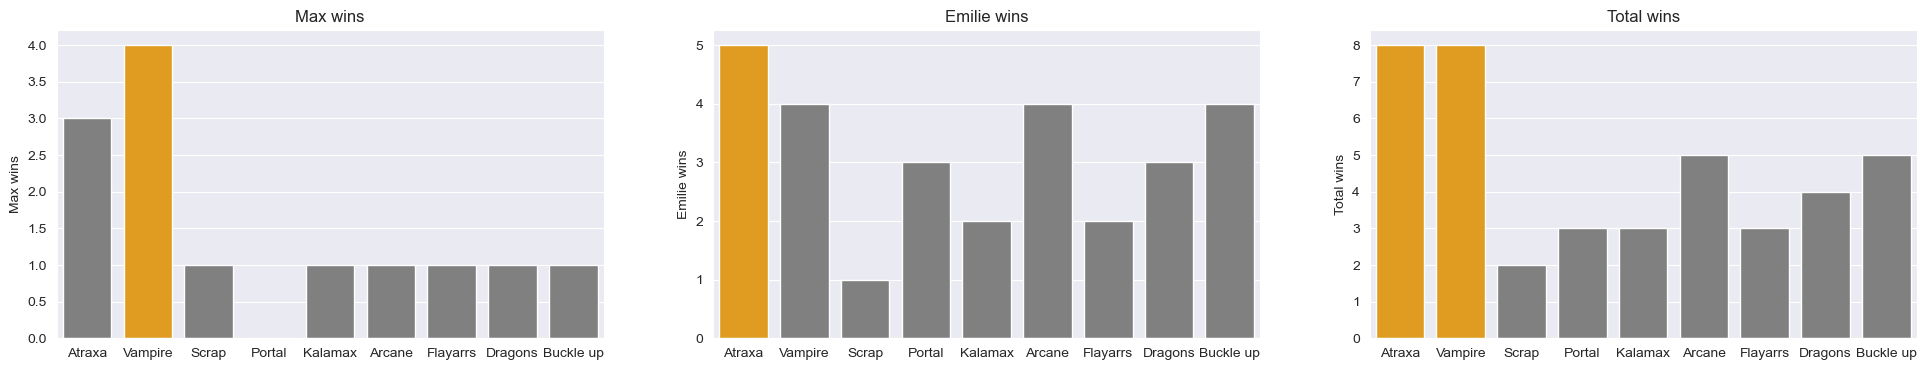

In [53]:
# Bar plots giving overview of won games
fig, axes = plt.subplots(1, len_names, figsize=(8*len_names, 4))

for i in range(len_names):
    key = f'{names[i]} wins'
    cols = ['grey' if (x < max(df[key])) else 'orange' for x in df[key]]
    sns.barplot(y = df[key], x = columns, ax = axes[i], palette=cols)
    axes[i].set_title(key)

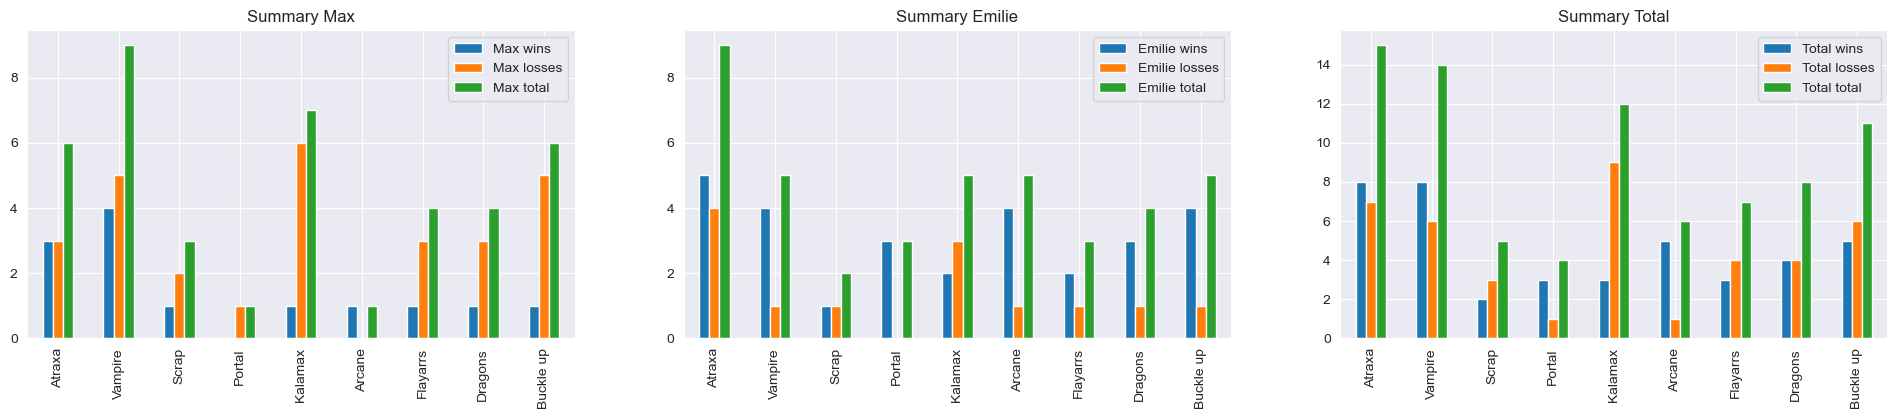

In [54]:
# Bar plots giving overview of played games
fig, axes = plt.subplots(1, len_names, figsize=(8*len_names, 4))

for i in range(len_names):
    df[[f'{names[i]} wins',f'{names[i]} losses', f'{names[i]} total']].plot(kind='bar', stacked=False, ax=axes[i])
    axes[i].set_title(f'Summary {names[i]}')


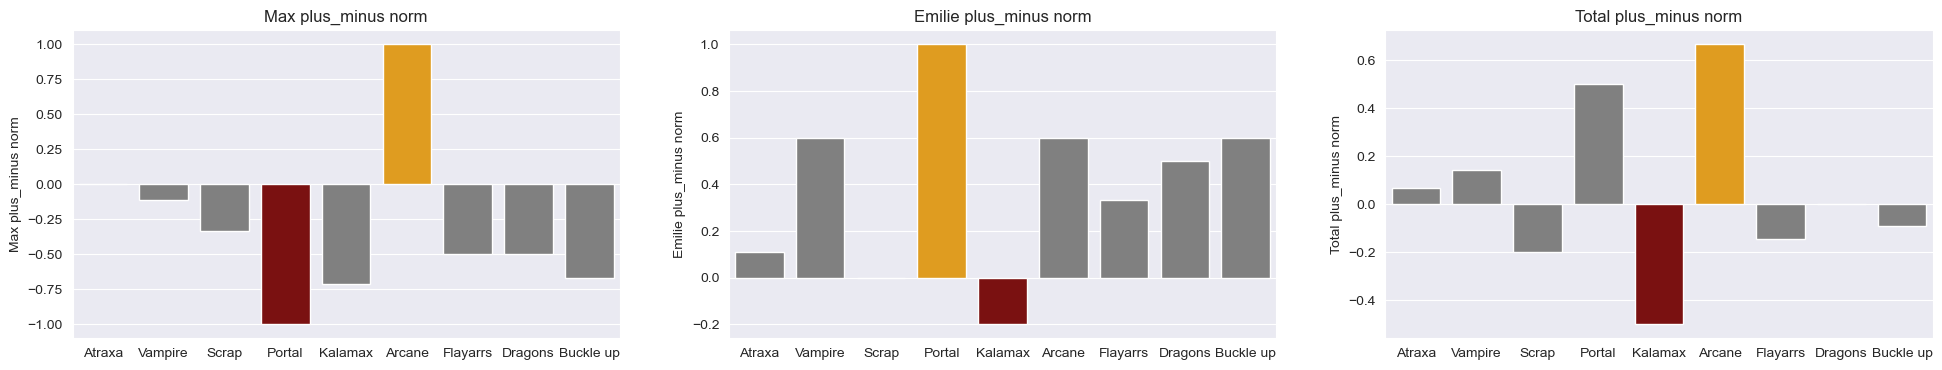

In [55]:
# Bar charts depicting "Plus_minus" scores normalized by nummber of played games
# -1 indicates that all games have been lost 
# 1 indicates that all games have been won
# 0 indicates that deck has same number of wins/losses

fig, axes = plt.subplots(1, len_names, figsize=(8*len_names, 4))

for i in range(len_names):
    key = f'{names[i]} plus_minus norm'
    cols = ['orange' if (x == max(df[key])) else ('darkred' if (x == min(df[key])) else 'gray') for x in df[key]]
    sns.barplot(y = df[key], x = columns, ax=axes[i], palette = cols)
    axes[i].set_title(key)

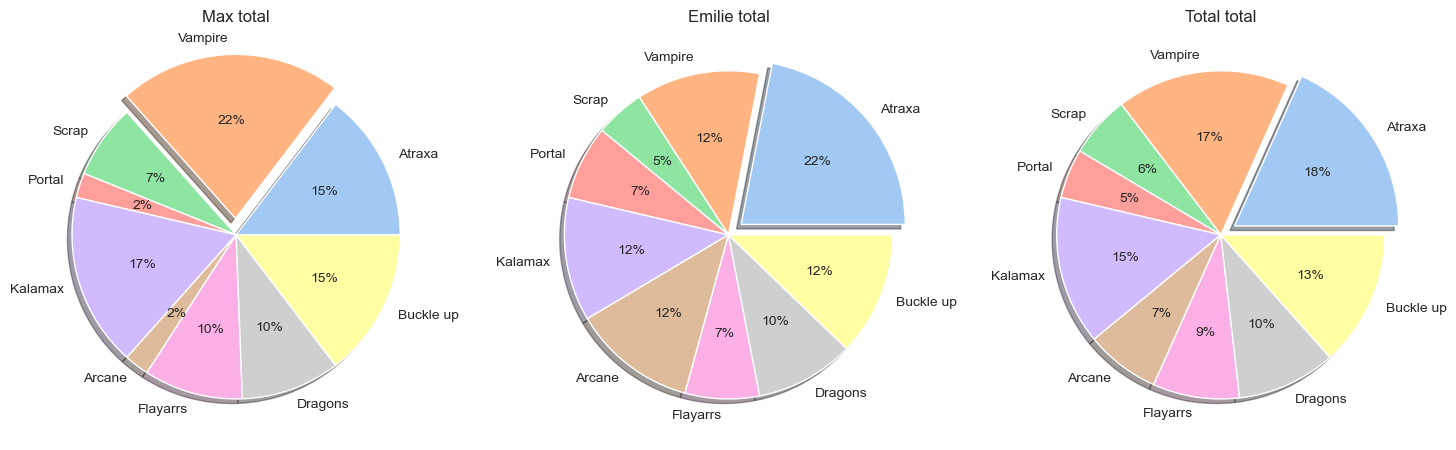

In [56]:
# Pie charts depicting portion of games that have been played wiith each deck
fig, axes = plt.subplots(1, len_names, figsize=(6*len_names, 6))

palette_color = sns.color_palette('pastel')

for i in range(len_names):
    key = f'{names[i]} total'
    explode = [0 if (x < max(df[key])) else 0.1 for x in df[key]]

    axes[i].pie(df[key], labels=columns, colors=palette_color, explode=explode, autopct='%.0f%%', shadow = True)
    axes[i].set_title(key)
    



# Deck stats

In [64]:
# Dataframe for deck stats (information gets lost in the player dataframe)
deck_df = pd.DataFrame(index = columns)

# Select player (0 or 1) if you want, to get overall set to -1
player_idx = 0

for deck in columns:
    deck_df[f'{deck} wins'] = player_dfs[player_idx].loc[deck].values
    deck_df[f'{deck} losses'] = player_dfs[player_idx][deck].values
    deck_df[f'{deck} total'] = deck_df[f'{deck} wins'] + deck_df[f'{deck} losses']

deck_df

,Atraxa wins,Atraxa losses,Atraxa total,Vampire wins,Vampire losses,Vampire total,Scrap wins,Scrap losses,Scrap total,Portal wins,...,Arcane total,Flayarrs wins,Flayarrs losses,Flayarrs total,Dragons wins,Dragons losses,Dragons total,Buckle up wins,Buckle up losses,Buckle up total
Atraxa,0,0,0,1,1,2,1,1,2,0,...,1,0,0,0,1,0,1,0,0,0
Vampire,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Scrap,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Portal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalamax,0,1,1,2,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Arcane,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Flayarrs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
Dragons,0,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Buckle up,0,0,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


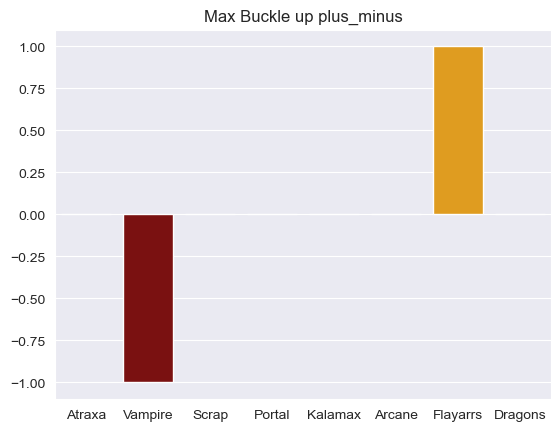

In [66]:
# Choose the deck you want to plot infromation for
deck = 'Buckle up'

plus_minus_deck = (deck_df[f'{deck} wins'] - deck_df[f'{deck} losses']).drop(deck)

cols = ['orange' if (x == max(plus_minus_deck)) else ('darkred' if (x == min(plus_minus_deck)) else 'gray') for x in plus_minus_deck]
sns.barplot(y = plus_minus_deck, x = columns.drop(deck), palette = cols)

ax = plt.gca()
ax.set_title(f"{names[player_idx]} {deck} plus_minus")
plt.show()

# Recommended matches

In [59]:
# Least played deck of respective player
print('----------------------------')
print(f"Least played by players: \t {df[f'{names[0]} total'].idxmin()} vs {df[f'{names[1]} total'].idxmin()}")
print('----------------------------')

# Least played matchup of least played deck
lp_deck = df[f'{names[-1]} total'].idxmin() #Least played deck
deck = deck_df[f'{lp_deck} total'].drop(lp_deck).idxmin()    
print(f"Least played decks, matchup: \t {lp_deck} vs {deck}")
print('----------------------------')

# Least played matchups (Can produce several matchups)
least_played = [min(deck_df[f'{deck} total'].drop(deck)) for deck in columns]
min_indices = [i for i, n in enumerate(least_played) if n == min(least_played)]

print(f"Least played matchups: \t \t Played {least_played[min_indices[0]]} times")

matchups = []
for i in min_indices:
    deck = columns[i]
    matchup = sorted([deck, deck_df[f'{deck} total'].drop(deck).idxmin()])
    if matchup not in matchups:
        matchups.append(matchup)
        print(f'{matchup[0]} vs {matchup[1]}')
print('----------------------------')


----------------------------
Least played by players: 	 Portal vs Scrap
----------------------------
Least played decks, matchup: 	 Portal vs Scrap
----------------------------
Least played matchups: 	 	 Played 0 times
Atraxa vs Flayarrs
Scrap vs Vampire
Portal vs Scrap
Arcane vs Vampire
Dragons vs Vampire
Buckle up vs Scrap
----------------------------
